# CS170A -- HW#4 -- assignment and solution form -- Matlab

Your name:  __Zhengkai Zhang____________________

Your UID:  _________

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor \,H\,/\,24\, \rfloor}$ points are
deducted.

<hr style="border-width:60px;"/>

# Problem 1:  Income Tax and Benford's Law

For every presidential candidate (except Donald Trump), income tax returns have been filed prior to an election:
<a href="http://www.taxhistory.org/www/website.nsf/Web/PresidentialTaxReturns?OpenDocument">
http://www.taxhistory.org/www/website.nsf/Web/PresidentialTaxReturns?OpenDocument</a>.

Some of these returns are impressive: Mitt Romney's 2011 tax return was 379 pages long!
<br/>
Hillary Clinton's income was the highest of the 2016 candidates (except perhaps Trump); see
<a href="http://www.taxhistory.org/thp/presreturns.nsf/Returns/FCA79776EFA029088525800D005A016C/$file/HR_Clinton_2015.pdf">her 2015 income tax return</a>.
<br/>
Bernie Sanders' reported income is barely enough for his family to survive in Los Angeles...

## 1.1  Hillary Clinton's 2014 and 2015 Income Tax returns

In this assignment, take the files <tt>HR_Clinton_2014_tax_return_numbers.txt</tt> and <tt>HR_Clinton_2015_tax_return_numbers.txt</tt> listing numbers in Hillary's tax returns for the last 2 years.

For each of these two files, determine (using the method in the Course Reader) whether the <i>unique</i> numbers in this file (please omit duplicates) violate Benford's Law.

In [42]:
H  =  dlmread('HR_Clinton_2014_tax_return_numbers.txt');  
A =  dlmread('HR_Clinton_2015_tax_return_numbers.txt', ',');  
length(H)


ans =

   192


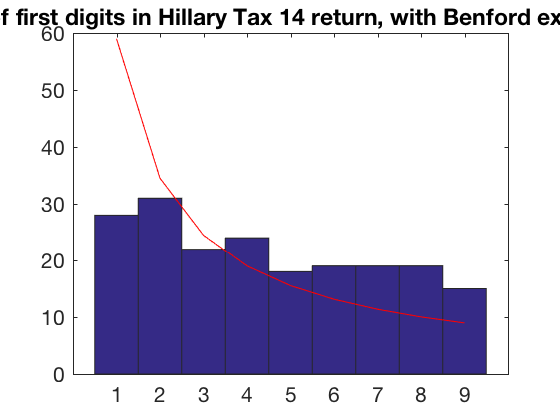

ChiSquareStatistic =

   38.4649


ChiSquareProbability =

    1.0000


In [43]:
 firstdigit = @(x) floor(x ./ (10 .^ floor(log10(x))));

 digits = unique(H);
 digits = firstdigit(digits);

 number_of_bins = 9;
 nu = number_of_bins - 1;

 HillaryHistogram = hist(digits,1:9);
 figure
 hist(digits,1:9);

 BenfordProbilities = diff(log10(1:10));
 N = length(digits);
 BenfordHistogram = N * BenfordProbilities;
 hold on
 plot(1:9, BenfordHistogram, 'r');
 title('Histogram of first digits in Hillary Tax 14 return, with Benford expected values')
 hold off

 ChiSquareStatistic = sum((HillaryHistogram - BenfordHistogram).^2 ./ BenfordHistogram)
%p = real(gammainc(max(ChiSquareStatistic,0)/2,nu/2));
%ChiSquareStatistic
%p
 ChiSquareProbability = cdf('Chisquare', ChiSquareStatistic, nu)
%since p is less than 0.8612,so it not violat Benford's Law.

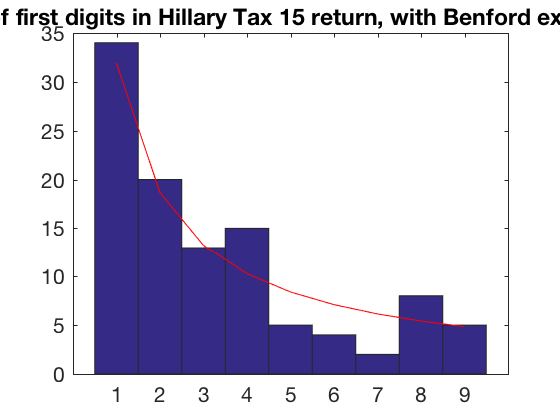

ChiSquareStatistic =

    9.1634


ChiSquareProbability =

    0.6713


In [44]:
 firstdigit = @(x) floor(x ./ (10 .^ floor(log10(x))));

 digits = unique(A);
 digits = firstdigit(digits);

 number_of_bins = 9;
 nu = number_of_bins - 1;

 HillaryHistogram = hist(digits,1:9);
 figure
 hist(digits,1:9);

 BenfordProbilities = diff(log10(1:10));
 N = length(digits);
 BenfordHistogram = N * BenfordProbilities;
 hold on
 plot(1:9, BenfordHistogram, 'r');
 title('Histogram of first digits in Hillary Tax 15 return, with Benford expected values')
 hold off

 ChiSquareStatistic = sum((HillaryHistogram - BenfordHistogram).^2 ./ BenfordHistogram)
%p = real(gammainc(max(ChiSquareStatistic,0)/2,nu/2));
%ChiSquareStatistic

 ChiSquareProbability = cdf('Chisquare', ChiSquareStatistic, nu)

%since p is less than 0.6713,so it not violat Benford's Law.

## 1.2  Donald Trump's 1995 Income Tax return

<a href="https://assets.documentcloud.org/documents/3117920/Pages-From-Donald-Trump-s-1995-Income-Tax-Returns.pdf">
3 pages of Donald Trump's 1995 Income Tax form</a>
have been published by the <a href="http://www.nytimes.com">New York Times</a>.

The file <tt>DJ_Trump_1995_tax_return_numbers.txt</tt>
lists numbers in this (partial) income tax return.

Determine whether the unique numbers in this file violate Benford's Law.

In [45]:
H  =  dlmread('DJ_Trump_1995_tax_return_numbers.txt', ',');  



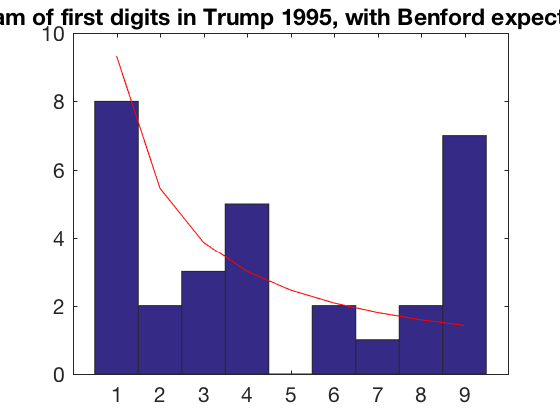

ChiSquareStatistic =

   28.7864


ChiSquareProbability =

    0.9997


In [47]:
 firstdigit = @(x) floor(x ./ (10 .^ floor(log10(x))));

 digits = unique(H);
 digits = firstdigit(digits);

 number_of_bins = 9;
 nu = number_of_bins - 1;

 HillaryHistogram = hist(digits,1:9);
 figure
 hist(digits,1:9);

 BenfordProbilities = diff(log10(1:10));
 N = length(digits);
 BenfordHistogram = N * BenfordProbilities;
 hold on
 plot(1:9, BenfordHistogram, 'r');
 title('Histogram of first digits in Trump 1995, with Benford expected values')
 hold off

 ChiSquareStatistic = sum((HillaryHistogram - BenfordHistogram).^2 ./ BenfordHistogram)
 ChiSquareProbability = cdf('Chisquare', ChiSquareStatistic, nu)


%since p is less than 0.9997 larger than 0.99,so it is violat Benford's Law.


<hr style="border-width:60px;"/>

# Problem 2: Earthquakes

For this assignment we want you to test whether earthquakes in a given region
occur with uniform frequency throughout the year.
Some geologists claim earthquakes are completely unpredictable, occurring randomly.

Specifically, we want you to compare the histograms of months in which the earthquakes compare
with an expected uniform histogram.

To do this, given a dataset of 20,000 earthquakes, we want you to create a histogram with 12 bins
giving the number of earthquakes that occurred within each of the 12 months of the year.
This is the <b>observed histogram</b> $O$.
Since there are 20,000 earthquakes, the total of all bins in $O$ will be 20,000.

<br/>

Next, create an expected histogram $E$ of 12 bins whose bins have values
<blockquote>
E = ([ 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31 ] / 365) * 20000
</blockquote>
giving a uniform expected number of earthquakes in each month.
(Simply ignore leap years for this assignment.)

<br/>

We want you to use the $\chi^2$ test to determine whether the earthquakes occur uniformly or not.
In Matlab you can use the <tt>cdf()</tt> function to compute probabilities of $\chi^2$ values.


<blockquote>
<pre>
help cdf

ChiSquareProbability = cdf( 'chisquare', ChiSquareStatistic, nu )
</pre>
</blockquote>

<br/>

Each dataset is a .csv file obtained from a server at
<a href="http://www.iris.edu/seismon">http://www.iris.edu/seismon</a>.
Earthquake times are reported in UTC (Coordinated Universal Time),
which is essentially the same thing as GMT (Greenwich Mean Time).
However, all we will need is the month in which each earthquake occurred.


## 2.1 Do large earthquakes in the area around New Zealand happen uniformly around the year?

On Sunday November 13 there was a 7.8 earthquake in New Zealand.

The file <tt>NewZealandQuakes.csv</tt> is a list of the 20,000 largest earthquakes since 1970
in the Tonga/Kermadec Islands region near New Zealand.
This region, where the Australian continent and Pacific Ocean meet, is very highly active earthquake-wise.
It is an amazing geological formation, a wall that is over 400 miles deep.

Does this distribution of month values of earthquakes differ significantly from a uniform distribution?

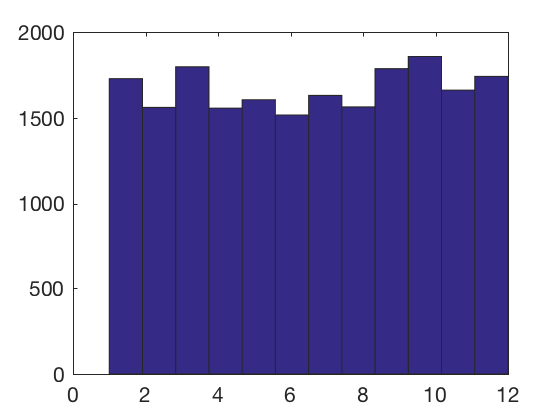

ChiSquareStatistic =

   1.0e+07 *

  Columns 1 through 7

    3.3711    3.0423    3.3711    3.2615    3.3711    3.2615    3.3711

  Columns 8 through 12

    3.3711    3.2615    3.3711    3.2615    3.3711


ChiSquareProbability =

     1     1     1     1     1     1     1     1     1     1     1     1


In [48]:
E = ([ 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31 ] / 365.0) * 20000;
Data1  =  dlmread('NewZealandQuakes.csv', ',',1,0);  
nbins=length(E);
%[ObservedHist,BinCenters] = hist(Month,linespace(0,1,nbins));
Month = Data1(:,2);
%data = Month -E;
Nvals = sum(Month);
N = length(Month);
df = nbins-1;
ChiSquareStatistic = sum((Month-E).^2./E)
%N = Length
ChiSquareProbability = cdf( 'chisquare', ChiSquareStatistic, df )
hist(Month,nbins);
hold on
%O = ... histogram of column 'Month' in the NewZealandQuakes.csv file ...

% ChiSquareStatistic = ... (O - E) ...

% determine whether ChiSquareStatistic is so large that it is unlikely the distribution is uniform.
% since p equal 1 it is not uniform distribution

## 2.2 Do large earthquakes in the area around Japan happen uniformly around the year?

The file <tt>JapanQuakes.csv</tt> is a list of the 20,000 largest earthquakes since 1970
in the region around Japan.
A magnitude 9.0 earthquake hit this area in 2011.

Does the distribution of month values of earthquakes in this region differ significantly from a uniform distribution?

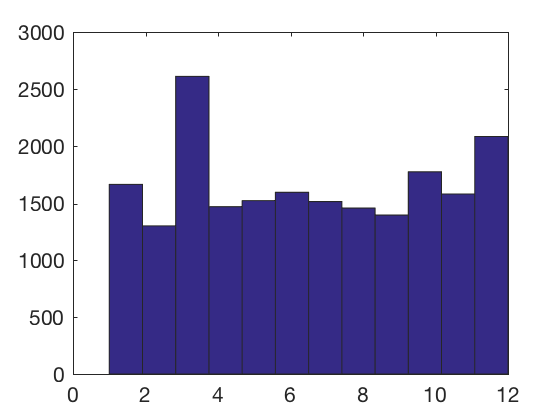

ChiSquareStatistic =

   1.0e+07 *

  Columns 1 through 7

    3.3713    3.0425    3.3713    3.2617    3.3713    3.2617    3.3713

  Columns 8 through 12

    3.3713    3.2617    3.3713    3.2617    3.3713


ChiSquareProbability =

     1     1     1     1     1     1     1     1     1     1     1     1


In [49]:
E = ([ 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31 ] / 365.0) * 20000;

%O = ... histogram of column 'Month' in the JapanQuakes.csv file ...
%Data1  =  dlmread('JapanQuakes.csv', ',',1,0);  
Data1  =  dlmread('JapanQuakes.csv', ',',1,0);  
nbins=length(E);
%[ObservedHist,BinCenters] = hist(Month,linespace(0,1,nbins));
Month = Data1(:,2);
%data = Month -E;
Nvals = sum(Month);
N = length(Month);
df = nbins-1;
ChiSquareStatistic = sum((Month-E).^2./E)
%N = Length
ChiSquareProbability = cdf( 'chisquare', ChiSquareStatistic, df )
hist(Month,nbins);
hold on
%O = ... histogram of column 'Month' in the NewZealandQuakes.csv file ...

% ChiSquareStatistic = ... (O - E) ...

% determine whether ChiSquareStatistic is so large that it is unlikely the distribution is uniform.
% ChiSquareStatistic = ... (O - E) ...

% determine whether ChiSquareStatistic is so large that it is unlikely the distribution is uniform.
% since p equal 1 it is not uniform distribution

# Problem 3:  Using Newton's Method on Matrices

The Course Reader explains that Newton's method for computing inverses $b^{-1}$
works by defining $f(x) = (1/x - b)$, giving a Newton iteration $x_{n+1} \,=\, g(x_n)$, where:

$$
g(x) ~ ~=~ ~ x ~-~ f(x)/f'(x) ~ ~=~ ~
x ~-~ \frac{1/x - b}{-1/x^2} ~ ~=~ ~ x ~ \left( 2 ~-~ bx \right) .
$$

A similar iteration obtained from $f(X) \,=\, (X^{-1} \,-\, B)$ can be used on matrices:

$$
g(X) ~=~ X ~-~ (\nabla f(X))^{-1} ~ f(X)
~=~ X ~-~ ({-X^{2}}) \; ({X^{-1} - B})
~=~ X ~ \left( 2\,I ~-~ B\,X \right) .
$$

<br/>

Use the iteration to obtain $B^{-1}$ for each of the Hilbert matrices $B$:
<ul><li><tt>B = hilb(4)</tt>
</li><li><tt>B = hilb(8)</tt>
</li><li><tt>B = invhilb(4)</tt>
</li><li><tt>B = invhilb(8)</tt>
</li></ul>

For <tt>B = hilb(...)</tt>, you can start with initial value $X=I$, the identity matrix.

For <tt>B = invhilb(...)</tt>, you will need to find a good starting value yourself.


For each such matrix $B$, determine how many iterations are needed for convergence,
and measure the relative error  $||X-B^{-1}|| ~/~ ||B^{-1}||$.

The function <tt>invhilb()</tt> can be used to obtain the exact value of the inverse of <tt>hilb()</tt>.

In [50]:
B = hilb(4);
Binv = invhilb(4);
  % starting value for the iteration
TwoI = eye(4)*2;
g = @(x) x*(TwoI-B*x);
X = eye(4);
i=0;
Relative_error=max((abs(X-Binv)/abs(Binv)));
Relative_error = max(max(Relative_error));
while (Relative_error >0.000000001)
    %disp(sprintf('iteration%3d: %16.15f',i,X))
    i=i+1;
    X=g(X);
    Relative_error =max(max((abs(X-Binv)/abs(Binv))));
    %Relative_error = max(Relative_error);
    %Relative_error = Relative_error-0.03;
end
i
% ...

i =

    18


In [51]:
B = hilb(8);
Binv = invhilb(8);
TwoI = eye(8)*2;
g = @(x) x*(TwoI-B*x);
X = eye(8);
i=0;
Relative_error =max(max((abs(X-Binv)/abs(Binv))));
while (Relative_error >0.019)
    %disp(sprintf('iteration%3d: %16.15f',i,X))
    i=i+1;
    X=g(X);
    Relative_error =max(max((abs(X-Binv)/abs(Binv))));
    %Relative_error = Relative_error-0.03;
end
i
% ...

i =

     1836799


In [52]:
B = invhilb(4);
Binv = hilb(4);
X=transpose(B)./norm(B);
TwoI = eye(4)*2;
g = @(x) x*(TwoI-B*x);
i=0;
Relative_error =max(max((abs(X-Binv)/abs(Binv))));
while (Relative_error >eps)
    %disp(sprintf('iteration%3d: %16.15f',i,X))
    i=i+1;
    X=g(X);
    Relative_error =max(max((abs(X-Binv)/abs(Binv))));
    %Relative_error = Relative_error-0.03;
end
i
% X = ... some clever starting value
% ...

i =

     7


In [53]:
B = invhilb(8);
Binv = hilb(8);
X=transpose(B)./norm(B);
TwoI = eye(8)*2;
g = @(x) x*(TwoI-B*x);
i=0;
Relative_error =max(max((abs(X-Binv)/abs(Binv))));
while (Relative_error >eps)
    %disp(sprintf('iteration%3d: %16.15f',i,X))
    i=i+1;
    X=g(X);
    Relative_error =max(max((abs(X-Binv)/abs(Binv))));
    %Relative_error = Relative_error-0.03;
end
i
% X = ... some clever starting value
% ...

i =

     6


<hr style="border-width:60px;"/>

# Problem 4: Regularized Optimization in Ridge Regression

In the traditional least squares model ${\bf y} \,=\, X {\bf c}$,
the vector of coefficients ${\bf c}$ is often chosen to minimize the least squared error

$$
\epsilon({\bf c}) ~~=~~ ||{{\bf y} ~-~ X {\bf c}}||^2 .
$$

<!-- %%% \item
%%% Using a vector iteration like that for the Banana function in the text,
%%% show how we can use Newton's method to obtain a least squares solution ${\bf c}$
%%% in the situation where the vector ${\bf c}$ contains two coefficients $c_1$ and $c_2$.
%%% -->
We can add a <i>constraint</i> that requires
<!-- %%% ${\bf c} \geq 0$, and/or requires that -->
$||{{\bf c}}||^2$ to be small.
This is often implemented by adding a <b>regularization term</b> $R({\bf c})$
to the error that is very large for values of ${\bf c}$ that violate the constraints.
In this case the iteration seeks to minimize the <b>regularized problem</b>

$$
\epsilon({\bf c}) ~+~ R({\bf c}) ~~=~~ ||{{\bf y} ~-~ X {\bf c}}||^2~+~ R({\bf c}) .
$$

## 4.0 Get the data

The dataset for this problem is called <tt>prostate.csv</tt>.
Read in this file.
The columns are lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa.

The regression problem is to predict lpsa from the other 8 variables.

In [54]:
% ...

%y = lpsa
data = dlmread('prostate.csv', ',',1,0); 
lcavol=data(:,1);
lweight=data(:,2);
age=data(:,3);
lbph=data(:,4);
svi=data(:,5);
lcp=data(:,6);
gleason=data(:,7);
pgg45=data(:,8);
lpsa=data(:,9);
X = [ lcavol lweight age lbph svi lcp gleason pgg45 ];
y=lpsa;
% ...

## 4.1 Tikhonov regularization

<b>Tikhonov regularization</b>
$R({\bf c}) = ||{T\,{\bf c}}||^2$ uses
a covariance matrix $T$ that is chosen to scale the $\bf{c}$ values properly.
In this case we want to solve the Tikhonov regularized least squares problem,
minimizing

$$
L({\bf c},T) ~=~
\epsilon({\bf c}) ~+~ R({\bf c}) ~ ~=~ ~
||{{\bf y} ~-~ X {\bf c}}||^2 ~+~ ||{T\,{\bf c}}||^2
~ ~=~ ~
\left|\left|{
\left({\!\!
\begin{array}{c}
{\bf y} \\
{\bf 0}
\end{array}
\!\!}\right)
\;-\;
\left({\!\!
\begin{array}{c}
X \\
T
\end{array}
\!\!}\right)
\,
{\bf c}
}\right|\right|^2 .
$$

To minimize the expression on the right, we need to find the least squares solution of:

$$
\left({
\begin{array}{c}
X \\
T
\end{array}
}\right)
~ {\bf c}
~ ~=~ ~
\left({
\begin{array}{c}
{\bf y} \\
{\bf 0}
\end{array}
}\right) .
$$

What are the <b>normal equations</b> for this equation
that we can use to obtain the least squares solution?

<u><b>My answer (to be filled in with Markdown and Equations):</b></u>

$$
\left({
\begin{array}{c}
X \\
T
\end{array}
}\right)'
\left({
\begin{array}{c}
X \\
T
\end{array}
}\right)
~ {\bf c}
~ ~=~ ~
\left({
\begin{array}{c}
{\bf y} \\
{\bf 0}
\end{array}
}\right) .
$$
$$
$$
$$
~~~
(X'X+T'T)c =X'y.
$$

From this equation give a formula for the <b>least squares solution</b> ${\bf c}$:

<u><b>My answer (to be filled in with Markdown and Equations):</b></u>

$$
{\bf c} ~=~ (X'X+T'T)^{-1}X^{-1}y
$$

## 4.2 Ridge Regression

Ridge Regression is a popular form of this least squares problem
when $T'\,T \,=\, \lambda\,I$ for some $\lambda \geq 0$
(so that $T'\,T$ has a 'ridge' down the diagonal).
As $\lambda$ decreases to 0, the problem reduces to the ordinary least squares,
while as $\lambda$ grows large, $||{{\bf c}}||$ becomes increasingly emphasized and minimization reduces it to zero.

Assume that the singular values of $X$ are $\sigma_1, \ldots, \sigma_p$.
What are the singular values of $(X'\,X ~+~ T'\,T)$?

<u><b>My answer (to be filled in with Markdown and Equations):</b></u>

We are assuming that $X$ has SVD $U S V'$, where $S$ is a diagonal matrix
whose $i$-th singular value is $\sigma_i$,
so $(X' X)$ has SVD $V S'S V'$, with $i$-th singular value $\sigma_i^2$.

Therefore, since $T = \lambda I$,
and $V D V' = D$ for any constant diagonal matrix $D = \lambda I$,
the $i$-th singular value of $(X' X + T' T)$ is
$$
\sigma_i^2 + \lambda
$$

Also give the singular values of the <b>hat matrix</b>
$$
H_{\lambda} \,=\, X\, (X'\,X \,+\, \lambda \,I)^{-1}\,X' .
$$

<u><b>My answer (to be filled in with Markdown and Equations):</b></u>

Again, we are assuming that $X$ has SVD $U S V'$, where $S$ has $i$-th singular value $\sigma_i$,
and $(X' X) = V S' S V'$ has $i$-th singular value $\sigma_i^2$.

Therefore, the $i$-th singular value of the hat matrix
$H_{\lambda} = X (X' X + \lambda I)^{-1} X'$ is
$$
$$
$$
\sigma_i^2 /(\sigma_i^2+\lambda)
$$

## 4.3 Degrees of Freedom

Define <b>degrees of freedom</b> $\mbox{df}(\lambda) \,=\, \mbox{trace}(\,H_{\lambda}\,)$,
where $H_{\lambda}$ is the hat matrix.
<!--
%% when $T'\,T \,=\, \lambda I$,
%% where $\lambda > 0$.
%% The regularization term encourages ${\bf c}$ to be small.
-->

Give a formula for $\mbox{df}(\lambda)$ in terms of $\lambda$ and the singular values of $X$:

<u><b>My answer (to be filled in with Markdown and Equations):</b></u>

Assuming the $i$-th singular value of the hat matrix
$H_{\lambda} = X (X' X + \lambda I)^{-1} X'$ is as in the previous answer,
$$
df(\lambda)=\sum_{i=1}^{N} \sigma_i^2 /(\sigma_i^2+\lambda)
$$

Also give a formula for $\mbox{df}(0)$:

<u><b>My answer (to be filled in with Markdown and Equations):</b></u>

$$
df(0) =\sum_{i=1}^{N} \sigma_i^2 /(\sigma_i^2+0) =N
$$

## 4.4  Actually computing regression coefficients for various values of $\lambda$


Using the prostate dataset,
let ${\bf y}$ be the vector <tt>lpsa</tt>,
and let $X$ be the matrix with the other variables.

Also normalize $X$ and ${\bf y}$ (i.e., replace them by their z-scores), so that all columns have the same scale.

Plot the value of the ridge regression coefficients ${\bf c}$
for all values of $\lambda$ from 0 to $2 \, ||{X' \, X}||$.

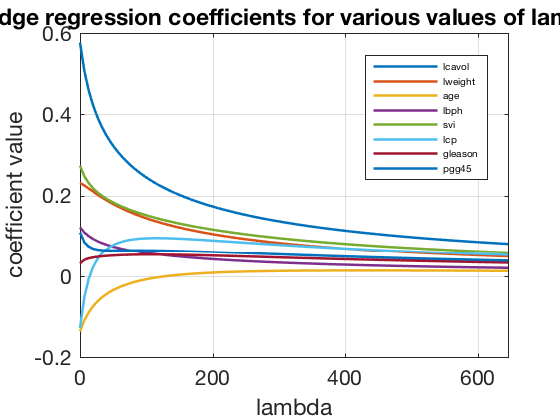

In [55]:
X= zscore(X);
y = zscore(y);
max_lambda = round( 2 * norm(X' * X) );
N = 100;
lambda_values = linspace( 0, max_lambda, N );
%c_values = zeros(8,N);
colors = { 'r' 'g' 'b' 'c' 'm' 'y' 'k' 'b' };
%[U,S,V] = svd(X);
c_values=ridge(y,X,lambda_values);

plot(lambda_values,c_values,'LineWidth',1.2)
ylim([-0.2 0.6])
xlim([0 max_lambda])
xlabel('lambda')
ylabel('coefficient value')
grid on
title('Ridge regression coefficients for various values of lambda')
legend( {'lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45'},'FontSize',5 )   %  add a legend showing variable names
hold off

## 4.5 Plotting the Generalized Cross-Validation function

An 'optimal' value of $\lambda$ will yield coefficients ${\bf c}$ that balances the residual sum of squares:

$$
RSS = ||{{\bf y} \,-\, \widehat{{\bf y}}}||^2 \,=\, ||{{\bf y} \,-\, H_{\lambda}\,{\bf y}}||^2
$$

Note $\widehat{{\bf y}} \,=\, H_{\lambda}\,{\bf y}$ depends on $\lambda$
and the regularization error $||{{\bf c}}||^2$.

Define the <b>Generalized Cross-Validation</b> (GCV) measure

$$
\mbox{GCV}(\lambda) ~=~ \frac{n}{(n - \mbox{df}(\lambda))^2} ~ ||{\,{\bf y} \,-\, \widehat{{\bf y}} \,}||^2 .
$$

Ridge Regression is often implemented by finding a value of $\lambda$
that minimizes $\mbox{GCV}(\lambda)$.

For the values of $\lambda$ that you used above, compute $\mbox{GCV}(\lambda)$.

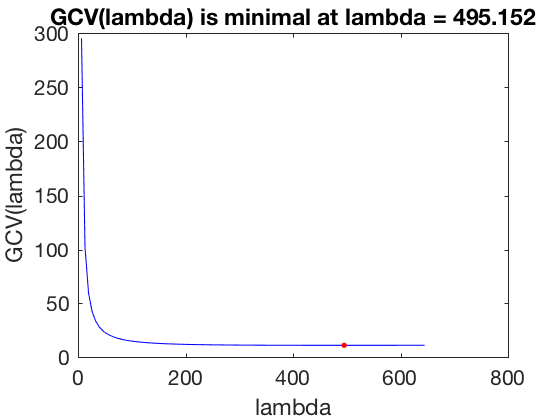

minimal_lambda_position =

    77


minimal_lambda =

  495.1515


In [56]:
% COMPLETE THIS CODE SO THAT IT PLOTS GCV(lambda) FOR VARIOUS VALUES OF lambda
% AND INCLUDE THE PLOT IN THE OUTPUT YOU SUBMIT.
S = svd(X);
S=S.^2;
df = @(l) sum(S./(S+ones(length(S),1)*l));
max_lambda = round( 2 * norm(X' * X) );
N = 100;
lambda_values = linspace( 0, max_lambda, N );
GCV = zeros(N,1);
for j=1:N
  GCV(j) = (8/((8-df(max_lambda*(j-1)/99)))^2)*(norm((y-X*c_values(:,j)),'fro'))^2;
end

minimal_lambda_position = find( GCV == min(GCV) )
minimal_lambda = lambda_values( minimal_lambda_position )

plot( lambda_values, GCV, 'b' )
xlabel('lambda')
ylabel('GCV(lambda)')
title( sprintf('GCV(lambda) is minimal at lambda = %7.3f', minimal_lambda) )
hold on
plot( [minimal_lambda], [min(GCV)], 'r.' )
hold off

## 4.6 Actually Optimizing Generalized Cross-Validation

First, develop a function that computes $\mbox{GCV}(\lambda)$.

Then, use an optimization routine to find a value $\lambda$
in the interval $[\, 0,\,2 \, ||{X' \, X}|| \,]$
for which $\mbox{GCV}(\lambda)$ is minimal.


In [57]:
%  optimization functions in Octave / Matlab

help fzero    % find a root of a univariate function

help fminbnd  % minimization of a univariate function

help fminsearch % minimization of a multivariate function

help fminunc % minimization of a multivariate function (with gradients)

help lsqlin   % linear least squares

help quadprog % quadratic programming

help lsqnonlin % nonlinear least squares

help fsolve   % solve set of nonlinear equations (vector-valued function)

FZERO  Single-variable nonlinear zero finding. 
    X = FZERO(FUN,X0) tries to find a zero of the function FUN near X0, 
    if X0 is a scalar.  It first finds an interval containing X0 where the 
    function values of the interval endpoints differ in sign, then searches 
    that interval for a zero.  FUN is a function handle.  FUN accepts real 
    scalar input X and returns a real scalar function value F, evaluated 
    at X. The value X returned by FZERO is near a point where FUN changes 
    sign (if FUN is continuous), or NaN if the search fails.  
 
    X = FZERO(FUN,X0), where X0 is a vector of length 2, assumes X0 is a 
    finite interval where the sign of FUN(X0(1)) differs from the sign of 
    FUN(X0(2)). An error occurs if this is not true.  Calling FZERO with a
    finite interval guarantees FZERO will return a value near a point where
    FUN changes sign.
 
    X = FZERO(FUN,X0), where X0 is a scalar value, uses X0 as a starting 
    guess. FZERO looks for an interval

In [58]:
% COMPLETE THIS CODE SO THAT IT FINDS A VALUE OF lambda THAT MINIMIZES GCV(lambda).

max_lambda = round( 2 * norm(X' * X) )

GCV_function = @(lambda) (8/((8-df(lambda)))^2)*(norm(y-X*((X'*X+lambda*eye(8))^(-1)*X'*y),'fro'))^2;

minimal_lambda =  fminbnd(GCV_function,0,max_lambda )


max_lambda =

   645


minimal_lambda =

  493.0375


<hr style="border-width:60px;"/>